# Question 1

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [30]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [31]:
#Checking for correlation
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


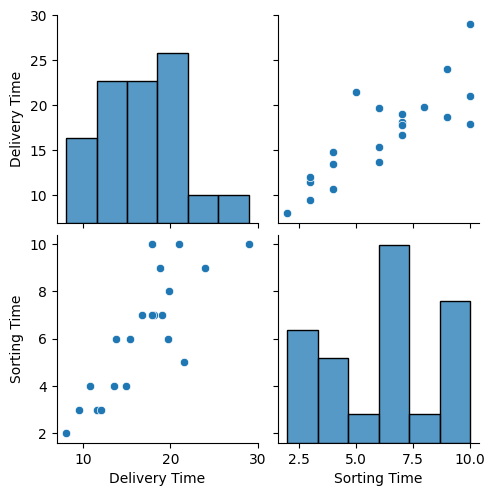

In [32]:
sns.pairplot(df)

<Axes: >

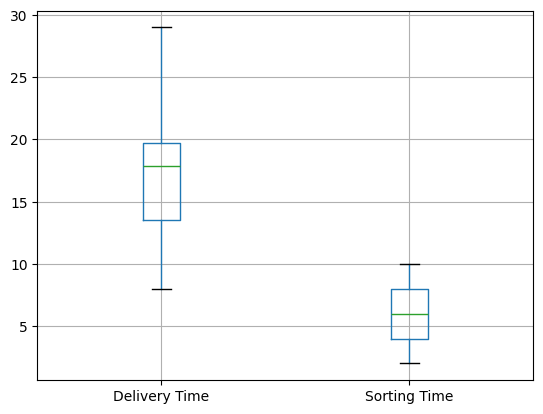

In [6]:
# Checking for outliers
df.boxplot()

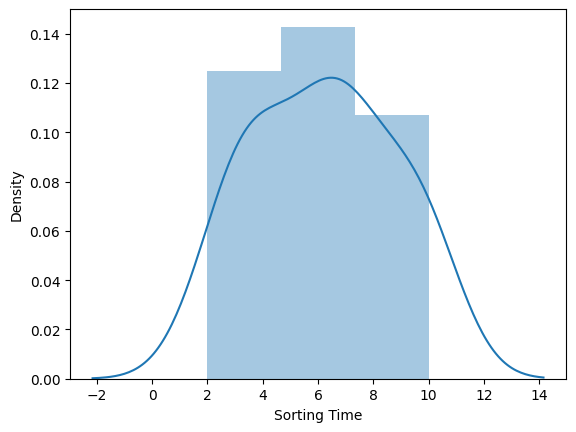

<Figure size 640x480 with 0 Axes>

In [7]:
sns.distplot(df['Sorting Time'])
fig=plt.figure()

In [35]:
# Applying log transformation
df['Sorting Time']=np.log(df['Sorting Time'])
df

,Delivery Time,Sorting Time
0,21.00,0.834032
1,13.50,0.326634
2,19.75,0.583198
3,24.00,0.787195
4,29.00,0.834032
5,15.35,0.583198
6,19.00,0.665730
7,9.50,0.094048
8,17.90,0.834032
9,18.75,0.787195


<Axes: xlabel='Sorting Time', ylabel='Density'>

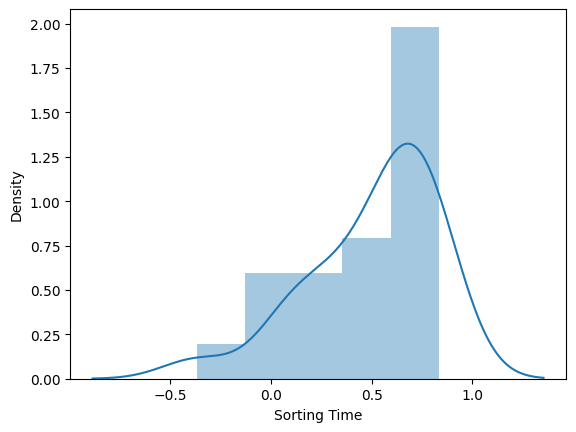

In [36]:
sns.distplot(df['Sorting Time'])

In [37]:
# identifying dependent and independent
x=df[['Sorting Time']]
y=df['Delivery Time']


In [38]:
x

,Sorting Time
0,0.834032
1,0.326634
2,0.583198
3,0.787195
4,0.834032
5,0.583198
6,0.665730
7,0.094048
8,0.834032
9,0.787195


In [39]:
y

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [40]:
# Scaling data in standard form
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 1.06287168],
       [-0.57321847],
       [ 0.25406383],
       [ 0.91184577],
       [ 1.06287168],
       [ 0.25406383],
       [ 0.52018491],
       [-1.32318641],
       [ 1.06287168],
       [ 0.91184577],
       [ 0.73419154],
       [-0.57321847],
       [ 0.52018491],
       [-1.32318641],
       [-1.32318641],
       [-0.57321847],
       [ 0.25406383],
       [ 0.52018491],
       [-2.80825065],
       [ 0.52018491],
       [-0.09196397]])

In [42]:
# slippting data in train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [43]:
x_train

array([[-0.57321847],
       [ 0.91184577],
       [-2.80825065],
       [ 0.25406383],
       [-1.32318641],
       [ 0.25406383],
       [ 0.91184577],
       [-0.09196397],
       [ 1.06287168],
       [ 0.52018491],
       [-1.32318641],
       [ 0.73419154],
       [-1.32318641],
       [ 0.52018491],
       [ 0.52018491]])

In [44]:
x_test

array([[ 1.06287168],
       [ 0.52018491],
       [-0.57321847],
       [-0.57321847],
       [ 1.06287168],
       [ 0.25406383]])

In [45]:

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [46]:
# Prediction
y_pred=reg.predict(x_test)
y_pred

array([21.89180859, 19.54563274, 14.81856598, 14.81856598, 21.89180859,
       18.39512222])

In [47]:
reg.coef_

array([4.32325971])

In [48]:
reg.intercept_

17.296738290169635

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.1997170189800589

In [50]:
r2_score(y_train,reg.predict(x_train))

0.6861901260417861

<Axes: xlabel='Delivery Time'>

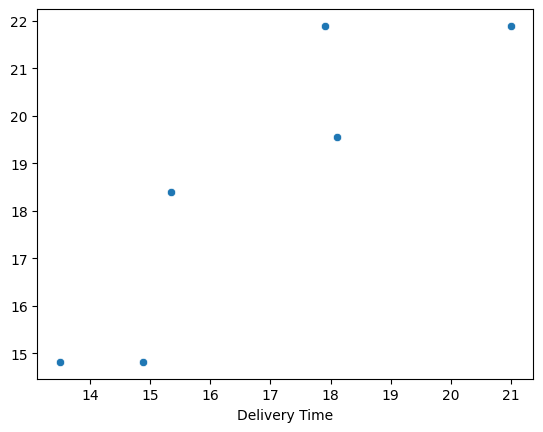

In [51]:
sns.scatterplot(x=y_test,y=y_pred)


# Building model using statsmodels

In [65]:
df.head() 

,Delivery Time,Sorting Time
0,21.00,0.834032
1,13.50,0.326634
2,19.75,0.583198
3,24.00,0.787195
4,29.00,0.834032


In [67]:
df.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},inplace=True)

In [68]:
df

,Delivery_Time,Sorting_Time
0,21.00,0.834032
1,13.50,0.326634
2,19.75,0.583198
3,24.00,0.787195
4,29.00,0.834032
5,15.35,0.583198
6,19.00,0.665730
7,9.50,0.094048
8,17.90,0.834032
9,18.75,0.787195


In [69]:
import statsmodels.formula.api as smf
model=smf.ols('Delivery_Time~Sorting_Time',data=df).fit()

In [70]:
model.params

Intercept       10.223388
Sorting_Time    13.020403
dtype: float64

In [71]:
model.rsquared

0.664762261535089

In [72]:
model.rsquared_adj

0.6471181700369357

In [73]:
new=pd.DataFrame(pd.Series([11,6,8]),columns=['Sorting_Time'])

In [74]:
new

,Sorting_Time
0,11
1,6
2,8


In [75]:
model.predict(new)

0    153.447816
1     88.345803
2    114.386609
dtype: float64

# Question 2

In [103]:
sal_df=pd.read_csv('Salary_Data.csv')
sal_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [104]:
sal_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [105]:
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [106]:
sal_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


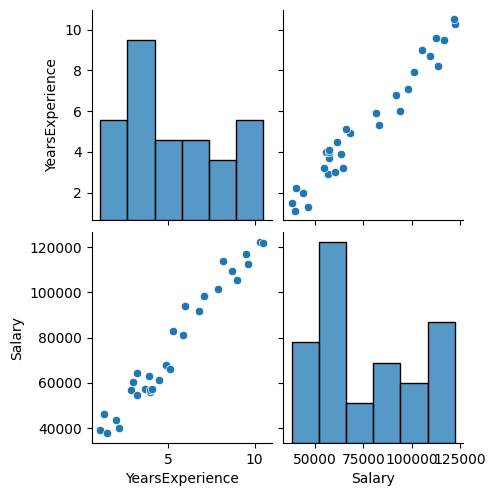

In [107]:
sns.pairplot(sal_df)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

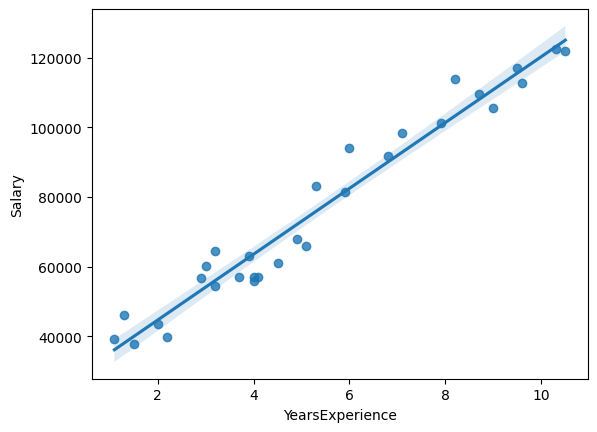

In [108]:
sns.regplot(x='YearsExperience',y='Salary',data=sal_df)

<Axes: >

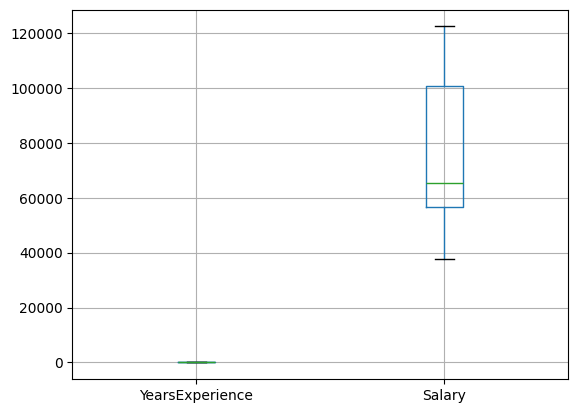

In [111]:
# checking for outliers
sal_df.boxplot()

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

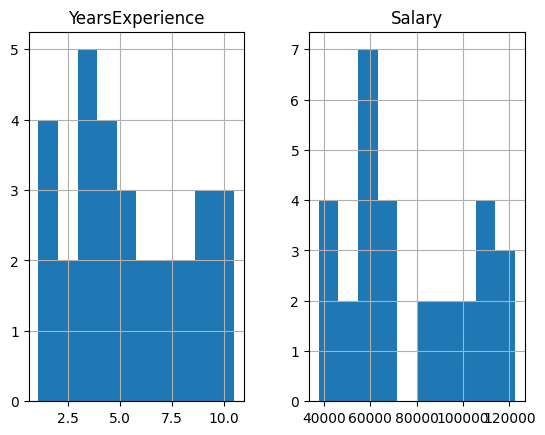

In [112]:
sal_df.hist()

In [113]:
# Applying log transformation
sal_df['YearsExperience']=np.log(sal_df['YearsExperience'])
sal_df

,YearsExperience,Salary
0,0.095310,39343.0
1,0.262364,46205.0
2,0.405465,37731.0
3,0.693147,43525.0
4,0.788457,39891.0
5,1.064711,56642.0
6,1.098612,60150.0
7,1.163151,54445.0
8,1.163151,64445.0
9,1.308333,57189.0


# Model building using statsmodels

In [114]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience',data=sal_df).fit()

In [115]:
model.params

Intercept          14927.97177
YearsExperience    40581.98796
dtype: float64

In [116]:
model.rsquared,model.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

In [117]:
new=pd.DataFrame(pd.Series([2.3,2.4,4.5,5.5,5.7]),columns=['YearsExperience'])

In [118]:
model.predict(new)

0    108266.544078
1    112324.742874
2    197546.917589
3    238128.905549
4    246245.303141
dtype: float64

# Model building using sklearn

In [119]:
sal_df.head()

,YearsExperience,Salary
0,0.095310,39343.0
1,0.262364,46205.0
2,0.405465,37731.0
3,0.693147,43525.0
4,0.788457,39891.0


In [120]:
x=sal_df[['YearsExperience']]
x
y=sal_df['Salary']
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [96]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# x_scaled=sc.fit_transform(x)
# x_scaled

array([[-3.74621818],
       [-2.28845588],
       [-1.66178487],
       [-0.88984604],
       [-0.7043703 ],
       [-0.271935  ],
       [-0.22681036],
       [-0.14462967],
       [-0.14462967],
       [ 0.02470088],
       [ 0.08149248],
       [ 0.10802734],
       [ 0.10802734],
       [ 0.13344422],
       [ 0.22542233],
       [ 0.30470722],
       [ 0.3404979 ],
       [ 0.37409238],
       [ 0.46381577],
       [ 0.47738354],
       [ 0.57459149],
       [ 0.60665448],
       [ 0.68301093],
       [ 0.70874019],
       [ 0.74867749],
       [ 0.77106302],
       [ 0.80605916],
       [ 0.81273969],
       [ 0.85685466],
       [ 0.86867745]])

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [122]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [123]:
reg.predict(x_test)

array([102816.685809  ,  77847.85554348,  96964.42244323,  80761.25804466,
        62028.69168369,  67418.83980575, 105429.70184247,  99161.91774112])

In [124]:
x_test

,YearsExperience
27,2.261763
15,1.589235
23,2.104134
17,1.667707
8,1.163151
9,1.308333
28,2.332144
24,2.163323


In [125]:
from sklearn.metrics import r2_score
r2_score(y_train,reg.predict(x_train))

0.8353725299185468